# IMDB 리뷰 데이터 셋

- 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해놓은 말뭉치

## 자연어 처리(natural language processing, NLP)

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야

- 새부 분야
  - 음성 인식
  - 기계 번역
  - 감성 분석

- 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부름

## 임베딩

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾼 결과 혹은 그 과정 전체

- 컴퓨터에서 처리하는 모든 것은 숫자로 이루어진 데이터
  - 따라서 텍스트 그 자체를 신경망에 전달하지 않음
  - 합성곱 신경망에서 이미지를 다룰 때는 이미지가 정수 픽셀값으로 이루어져 있어서 특별히 변환을 하지 않음

- 텍스트 임베딩의 가장 쉬운 방법은 데이터에 등장하는 단어마다 고유한 점수를 부여하는 것
  - 예)
    - he : 10
    - follows : 11
    - the : 12
    - cat : 13
  
  - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음
    - He를 10에 매핑하고 cat을 13에 매핑하더라도 cat이 He보다 좋거나 크다는 뜻이 아님

  - 정수 중 몇 가지는 특정한 용도로 예약되어 있는 경우가 많음
    - 예) 0 : 패딩, 1 : 문장의 시작, 2 : 어휘 사전에 없는 토큰
      - 어휘 사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록

- 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리
  - 이렇게 분리된 단어를 토큰(token)이라고 부름
    - 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 이 떄 하나의 토큰이 하나의 타임스텝에 해당

    - 영어 말뭉치에서 토큰은 단어와 같이 취급하는 경우가 많음
      - 한국어는 조사가 발달되어 있어 공백으로 나누는 것만으로는 부족함
        - 일반적으로 한글은 형태소 분석을 통해 토큰을 분리

# 원핫 인코딩을 활용한 RNN 텍스트 분류

## 데이터 준비

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# num_words : 단어 빈도가 많은 순서로 num_words 만큼 보존
# 전체 데이터셋이서 가장 자주 등장하는 단어 500개만 사용
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 500)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# 훈련 세트, 테스트 세트의 크기 확인
print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [7]:
# 리뷰의 길이 출력
print(len(x_train[0]), len(x_train[1]))

218 189


- 각각 25000개의 샘플로 이루어져 있음

- 텍스트 길이가 제각각임
  - 고정 크기가 2차원 배열의 담는 것 보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [8]:
# 첫 번쨰 리뷰 출력
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
# 타킷 데이터 출력
# 0 : 부정, 1 : 긍정
print(y_train[:10])

[1 0 0 1 0 0 1 0 1 0]


In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify= y_train, random_state= 26)

### 각 리뷰의 길이 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최솟값, 길이 최댓값을 확인

In [11]:
lengths = np.array([len(x) for x in x_train])

In [12]:
# 길이 평균값과 중간값
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

238.5516 178.0 11 2494


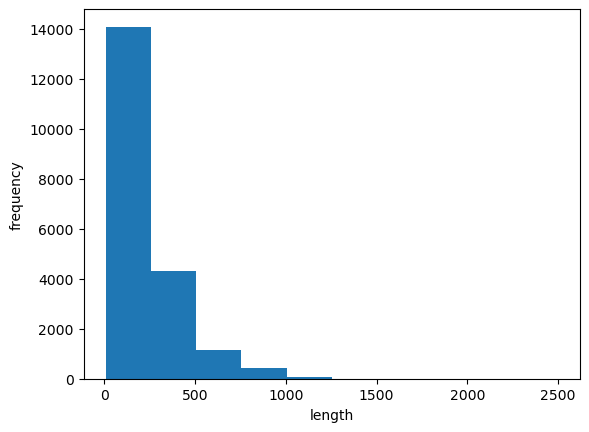

In [13]:
plt.figure()
plt.hist(lengths)
plt.xlabel("length") 
plt.ylabel("frequency") 
plt.show()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문

- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100에 맞춰서 사용
  - 100보다 짧은 리뷰는 길이를 100에 맞추기 위해 패딩이 필요
    - 패딩을 나타내는 토큰으로는 0을 사용

In [14]:
# x_train 의 길이를 100으로 맞추기
train_seq = pad_sequences(x_train, maxlen= 100)

- maxlen에 원하는 길이를 지정하면 그것보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩

In [15]:
# train_seq 크기 확인
print(train_seq.shape)

(20000, 100)


In [16]:
print(train_seq[0])

[101   2   2   7   2  89 196  26  75 424   8 264  15  84  70  30   2  11
   2   2   2   5 131   2   2   2   2   2   6  22  15 286   2  18 101 116
   2  33   4   2  13   6   2   2  11   2   5 117 334  10  10   4  64 282
  13   2  14  17   6   2   2   9  13  81  24   2   4   2   7 158   2   2
 291 154   2   2 451   2  57   2 216   8  27   2   5  13 244  24  66   2
  11   2   6   2   7   2  65 116  42   2]


In [17]:
print(x_train[0][-100:])

[101, 2, 2, 7, 2, 89, 196, 26, 75, 424, 8, 264, 15, 84, 70, 30, 2, 11, 2, 2, 2, 5, 131, 2, 2, 2, 2, 2, 6, 22, 15, 286, 2, 18, 101, 116, 2, 33, 4, 2, 13, 6, 2, 2, 11, 2, 5, 117, 334, 10, 10, 4, 64, 282, 13, 2, 14, 17, 6, 2, 2, 9, 13, 81, 24, 2, 4, 2, 7, 158, 2, 2, 291, 154, 2, 2, 451, 2, 57, 2, 216, 8, 27, 2, 5, 13, 244, 24, 66, 2, 11, 2, 6, 2, 7, 2, 65, 116, 42, 2]


- pad_sequence() 함수는 기본적으로 maxlen 보다 긴 시퀀스의 앞부분을 잘라냄
  - 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하기 때문에
    - 리뷰 끝에 결정적인 소감을 말할 가능성이 더 높음

  - 시퀀스의 뒷부분을 잘라내고 싶다면
    - truncating 매개변수 값을 "post"로 변경
      - 기본 값은 "pre"

In [18]:
print(train_seq[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1  13  81 169  12   6 227   2 279  45  43
  88 207 115 110   6   2 310   2   2  21  13  43  92  79  83  12  40   6
 176   7  85  84  81   4   2   9  66  87 151  17   2   2   6   2   6 136
  15 299  11  61 419 175  58  13 140   2]


- 패딩 토큰은 시퀀스의 앞부분에 추가됨
  - 시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 되게 때문에
  - 뒷부분에 패딩을 추가하고 싶다면
    - padding 매개 변수의 값을 "post"로 변셩
      - 기본 값은 "pre"

In [19]:
# 검증 세트의 길이를 100으로 맞추기
val_seq = pad_sequences(x_val, maxlen=100)

## 모델 구성

- 케라스의 SimpleRNN 클래스 사용
- 이진 분류
  - 출력층은 1개의 유닛을 가지고 시그모이드 출력층 함수를 사용

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape = (100, 100)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

- 입력층
  - 입력 차원의 첫 번째 차원은 샘플의 길이
  - 입력 차원의 두 번째 차원은 고유한 단어 수
    - load_data() 함수에서 500개의 단어만 사용하도록 지정했기 떄문에 이번 예제의 고유한 단어 수는 500

- SimplrRNN
  - 첫 번째 매개변수는 사용할 유닛의 개수

  - activation
    - 기본 값은 "tanh"
      - 하이퍼볼릭 탄젠트

- 원핫인코딩을 사용하는 이유
  - 토큰을 정수로 변환한 데이터를 그대로 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦
    - 정수 사이에는 어떤 관련도 없고 20번 토큰이 10번 토큰보다 중요한 것이 아님

In [21]:
# 케라스에서 제공하는 원핫 인코딩을 휘한 함수
train_oh = keras.utils.to_categorical(train_seq)

In [22]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
train_oh[0, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
print(np.sum(train_oh[0, 0]))

1.0


- 하나의 원소만 1이고 나머지 원소는 모두 0임

In [25]:
# val_seq 원핫 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │           872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

- SimpleRNN 에 전달할 샘플의 크기는 (100, 500) 이지만 순환층은 마지막 타임스텝의 은닉 상태만 출력
  - 출력 크기가 순환층의 유닛 개수와 동일

- 파라미터 개수
  - 입력 토큰은 500차원의 원핫 인코딩 배열

  - 배열이 순환층의 유닛 8개와 완전 연결
    - 500 * 8 = 4000

  - 순환층의 은닉 상태는 다시 다음 타임스텝에 사용하기 위해 또 다른 가중치와 곱해짐
    - 은닉 상태 크기 * 유닛 수
      - 8 * 8 = 64

  - 각 유닛마다 하나의 절편
    - 8

  - 4000 + 64 + 8 = 4072

## 모델 훈련

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)
model.compile(optimizer= rmsprop, loss= " binary_crossentropy", metrics=["accuracy"]) 

cp_cb = keras.callbacks.ModelCheckpoint("./model/best-simplearn-model.keras", save_best_only= True)
es_cb = keras.callbacks.EarlyStopping(patience= 4, restore_best_weights= True)

In [29]:
history = model.fit(train_oh, y_train, epochs= 100, batch_size= 64, validation_data= (val_oh, y_val), callbacks=[cp_cb, es_cb])

Epoch 1/100


ValueError: Exception encountered when calling SimpleRNNCell.call().

[1mDimensions must be equal, but are 500 and 100 for '{{node sequential_1/simple_rnn_1/simple_rnn_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/simple_rnn_1/strided_slice_2, sequential_1/simple_rnn_1/simple_rnn_cell_1/Cast/ReadVariableOp)' with input shapes: [?,500], [100,8].[0m

Arguments received by SimpleRNNCell.call():
  • sequence=tf.Tensor(shape=(None, 500), dtype=float32)
  • states=('tf.Tensor(shape=(None, 8), dtype=float32)',)
  • training=True

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 원핫 인코딩의 단점
  - 입력 데이터가 매우 커짐

In [31]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 8000000000


- 토큰 1갸를 500차원으로 늘렸기 때문에 용량이 커짐
  - 훈련 데이터가 커질수록 문제가 더 심해짐

# 단어 임베딩을 활용한 RNN텍스트 분류

<img src = "./image/embedding.png">

- 단어 임베딩(word embedding)
  - 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법
  - 각 단어를 고정된 크기의 실수 벡터로 변환

- 단어 임베딩으로 만들어진 벡터는 원핫 인코딩 벡터보다 훨씬 의미 있는 값으로 채워져 있음
  - 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
  - 단어 임베딩 벡터를 만드는 층은 Embedding 클래스로 케라스에서 제공
    - 처음에는 모든 벡터가 랜덤하게 초기화되고 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습

- 단어 임베딩의 장점
  - 입력으로 정수 데이터를 받음
    - 원핫 인코딩으로 변경된 배열이 아니라 train_seq를 바로 사용할 수 있음
    - 메모리를 훨씬 효율적으로 사용할 수 있음
  
  - 원핫 인코딩보다 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

In [32]:
model2 = keras.Sequential()
model2.add(keras.Input(shape= (100,)))
model2.add(keras.layers.Embedding(500, 32))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation= "sigmoid"))

- 입력층
  - 앞엣 샘플의 길이를 100으로 맞추어서 같은 길이로 설정

- Embedding 
  - 첫 번쨰 매개변수는 어휘 사전의 크기
    - 앞에서 IMDB 데이터셋에서 500개의 단어만 사용하도록 설정했기 때문에 같은 값으로 설정
  - 두 번째 매개변수는 임베딩 벡터의 크기